In [1]:
import os
import tools
import numpy as np
import pandas as pd
import scanpy as sc

sc.logging.print_header()

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.21.5 scipy==1.7.1 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.12.2 python-igraph==0.9.8 pynndescent==0.5.5


In [2]:
os.chdir('/lustre/scratch117/cellgen/team297/kt16/COVID_imperial_renal')

In [3]:
adata = sc.read_h5ad('h5ad/df.fil3_gex.h5ad')
adata

AnnData object with n_obs × n_vars = 916806 × 33559
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartm

In [4]:
adata.obsm['X_umap'] = adata.obsm['X_umapafterharmony_rna']

In [5]:
adata.obs[adata.obs['sample_id'] == 'NA'][['merged_souporcell_cluster', 'merged_souporcell_status', 'patient_id', 'sample_id',]]

merged_souporcell_cluster  \
UK-CIC10689738+UK-CIC10690026_AAACCTGAGCGACGTA-1                       2/1   
UK-CIC10689738+UK-CIC10690026_AAACCTGCACGCGAAA-1                       1/2   
UK-CIC10689738+UK-CIC10690026_AAACCTGTCTGCGTAA-1                       0/1   
UK-CIC10689738+UK-CIC10690026_AAACGGGCACAAGACG-1                       2/3   
UK-CIC10689738+UK-CIC10690026_AAACGGGCATTAACCG-1                       2/1   
...                                                                    ...   
UK-CIC10690384+UK-CIC10690576_TTTGTCAAGTTACGGG-1                         1   
UK-CIC10690384+UK-CIC10690576_TTTGTCACACTACAGT-1                         1   
UK-CIC10690384+UK-CIC10690576_TTTGTCACATGTCGAT-1                       0/4   
UK-CIC10690384+UK-CIC10690576_TTTGTCAGTTACCGAT-1                         3   
UK-CIC10690384+UK-CIC10690576_TTTGTCATCACATACG-1                         1   

                                                 merged_souporcell_status  \
UK-CIC10689738+UK-CIC10690026_AAACCTGAGCGACGTA-1                  doublet   
UK-CIC10689738+UK-CIC10690026_AAACCTGCACGCGAAA-1                  doublet   
UK-CIC10689738+UK-CIC10690026_AAACCTGTCTGCGTAA-1                  doublet   
UK-CIC10689738+UK-CIC10690026_AAACGGGCACAAGACG-1                  doublet   
UK-CIC10689738+UK-CIC10690026_AAACGGGCATTAACCG-1                  doublet   
...                                                                   ...   
UK-CIC10690384+UK-CIC10690576_TTTGTCAAGTTACGGG-1                  singlet   
UK-CIC10690384+UK-CIC10690576_TTTGTCACACTACAGT-1                  singlet   
UK-CIC10690384+UK-CIC10690576_TTTGTCACATGTCGAT-1                  doublet   
UK-CIC10690384+UK-CIC10690576_TTTGTCAGTTACCGAT-1                  singlet   
UK-CIC10690384+UK-CIC10690576_TTTGTCATCACATACG-1                  singlet   

                                                  patient_id sample_id  
UK-CIC10689738+UK-CIC10690026_AAACCTGAGCGACGTA-1        NULL        NA  
UK-CIC10689738+UK-CIC10690026_AAACCTGCACGCGAAA-1        NULL        NA  
UK-CIC10689738+UK-CIC10690026_AAACCTGTCTGCGTAA-1        NULL        NA  
UK-CIC10689738+UK-CIC10690026_AAACGGGCACAAGACG-1        NULL        NA  
UK-CIC10689738+UK-CIC10690026_AAACGGGCATTAACCG-1        NULL        NA  
...                                                      ...       ...  
UK-CIC10690384+UK-CIC10690576_TTTGTCAAGTTACGGG-1  unresolved        NA  
UK-CIC10690384+UK-CIC10690576_TTTGTCACACTACAGT-1  unresolved        NA  
UK-CIC10690384+UK-CIC10690576_TTTGTCACATGTCGAT-1        NULL        NA  
UK-CIC10690384+UK-CIC10690576_TTTGTCAGTTACCGAT-1  unresolved        NA  
UK-CIC10690384+UK-CIC10690576_TTTGTCATCACATACG-1  unresolved        NA  

[185615 rows x 4 columns]

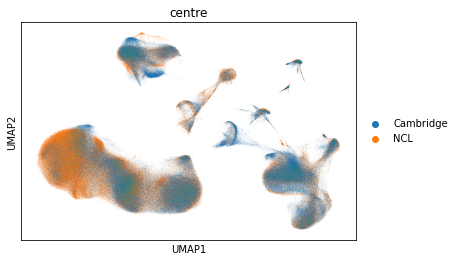

In [6]:
sc.pl.umap(adata, color = 'centre')

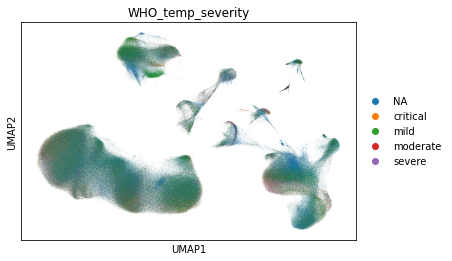

In [7]:
sc.pl.umap(adata, color = 'WHO_temp_severity')

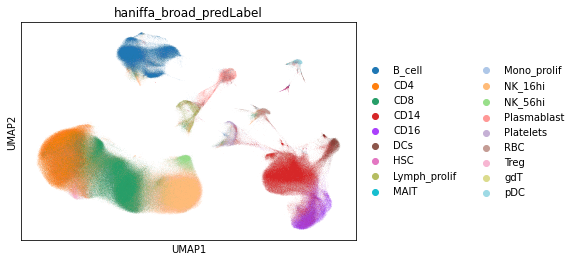

In [8]:
sc.pl.umap(adata, color = 'haniffa_broad_predLabel')

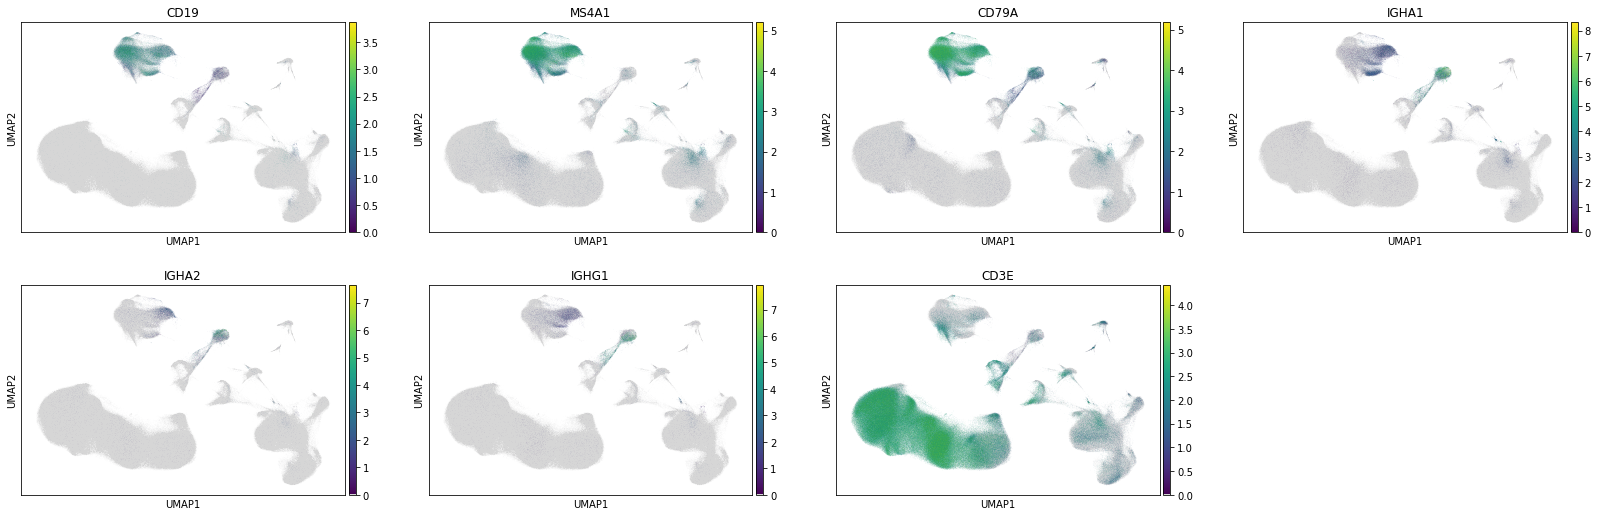

In [9]:
sc.pl.umap(adata, color = ['CD19', 'MS4A1', 'CD79A', 'IGHA1', 'IGHA2', 'IGHG1', 'CD3E'], color_map = tools.cmp())

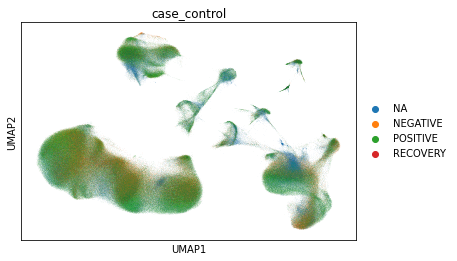

In [10]:
sc.pl.umap(adata, color = 'case_control')

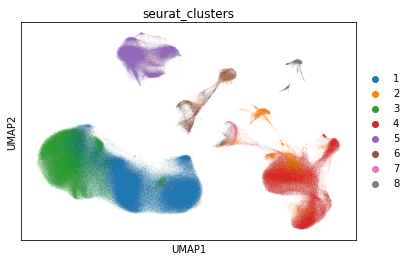

In [11]:
sc.pl.umap(adata, color = 'seurat_clusters')

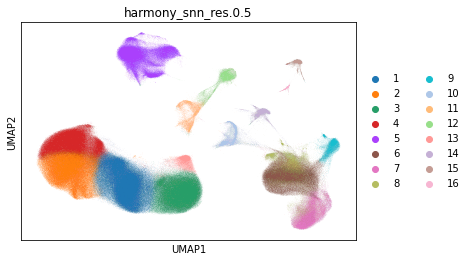

In [12]:
sc.pl.umap(adata, color = 'harmony_snn_res.0.5')

In [48]:
# fix the metadata
meta = pd.read_csv('sc_meta.csv')
meta

sample_id individual_id ethnicity sex  calc_age                  ihd  \
0    C126_3004          C126     asian   M        64                   no   
1     C89_2104           C89     asian   F        70             yes.cabg   
2    C132_1105          C132     asian   F        77             yes.cabg   
3     C60_1604           C60     white   M        80                   no   
4     C23_1504           C23     asian   F        78  yes.no.intervention   
..         ...           ...       ...  ..       ...                  ...   
229  C170_0403          C170     asian   M        82                   no   
230  C187_2502          C187     other   M        70                   no   
231  C190_0903          C190     white   M        54                   no   
232   C58_1003           C58     white   F        72              unknown   
233  C169_3001          C169     asian   F        73  yes.no.intervention   

    previous_vte  copd diabetes      smoking  ... sample_date temp_WCC  \
0             no    no       no        never  ...  30/04/2020      6.4   
1             no    no   yes.T2  not.current  ...  21/04/2020      NaN   
2             no    no   yes.T2  not.current  ...  11/05/2020      NaN   
3             no   yes   yes.T2  not.current  ...  16/04/2020      3.8   
4             no    no   yes.T2        never  ...  15/04/2020      NaN   
..           ...   ...      ...          ...  ...         ...      ...   
229           no    no   yes.T2  not.current  ...  04/03/2021      NaN   
230       yes.pe  copd   yes.T2  not.current  ...  25/02/2021      NaN   
231           no    no   yes.T2  not.current  ...  09/03/2021      NaN   
232           no    no       no  not.current  ...  10/03/2021      NaN   
233           no    no       no  not.current  ...  30/01/2021      NaN   

    temp_neut temp_mono temp_lymph temp_CRP temp_ddimer temp_ferritin  \
0         3.6       0.7        1.7      0.6       913.0         200.0   
1         NaN       NaN        NaN      NaN         NaN           NaN   
2         NaN       NaN        NaN      NaN         NaN           NaN   
3         2.5       0.2        0.9     16.8      1005.0        1936.0   
4         NaN       NaN        NaN      NaN         NaN           NaN   
..        ...       ...        ...      ...         ...           ...   
229       NaN       NaN        2.9      NaN      1193.0         336.0   
230       NaN       NaN        0.9      NaN       294.0         292.0   
231       NaN       NaN        0.3      NaN      2154.0         292.0   
232       NaN       NaN        1.1     18.2         NaN           NaN   
233       NaN       NaN        NaN      NaN         NaN           NaN   

    temp_trop WHO_temp_severity  
0        12.0              mild  
1         NaN               NaN  
2         NaN              mild  
3        35.0          moderate  
4         NaN          moderate  
..        ...               ...  
229       NaN               NaN  
230       NaN               NaN  
231       NaN               NaN  
232       NaN               NaN  
233       NaN              mild  

[234 rows x 30 columns]

In [77]:
# fix the sample_id information in adata
meta_sample_id = []
for x in adata.obs['sample_id']:
    if x == 'NA':
        meta_sample_id.append(x)
    elif len(x.split('_')[1]) == 4:
        meta_sample_id.append(x)
    else:
        meta_sample_id.append(x[:-2])
adata.obs['sample_id'] = meta_sample_id

In [87]:
for x in meta:
    if x != 'sample_id':
        tmp = dict(zip(meta['sample_id'], meta[x]))
        if meta[x].dtype == 'object':
            tmp.update({'NA':'NA'})
        else:
            tmp.update({'NA':np.nan})
        adata.obs[x] = [tmp[y] for y in adata.obs['sample_id']]

In [88]:
# adata.obs['individual_id'] = [x.split('_')[0] for x in adata.obs['sample_id']]

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'ethnicity' as categorical
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'sex' as categorical
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories

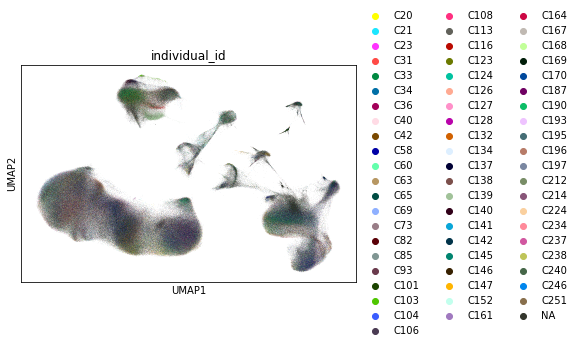

In [89]:
sc.pl.umap(adata, color = 'individual_id')

In [83]:
# create a separate object so that i can use the extract the BCRs
df = adata.obs[~(adata.obs['individual_id'] == 'NA')]
df.shape

(731191, 162)

In [86]:
df.to_csv('h5ad/df.fil3.kt.metadata_for_bcr.csv.gz', compression = 'gzip')

### First look

In [31]:
# subset to B cell looking clusters
bdata = adata[adata.obs['harmony_snn_res.0.5'].isin(['5', '12'])].copy()
bdata

AnnData object with n_obs × n_vars = 111873 × 33559
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartm

In [32]:
# remove CLL samples and infected samples
bdata = bdata[~(bdata.obs['individual_id'].isin(['C139', 'C116']))].copy() # note to remove 'C141' from the deg analysis later because of infection
bdata

AnnData object with n_obs × n_vars = 100242 × 33559
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartm

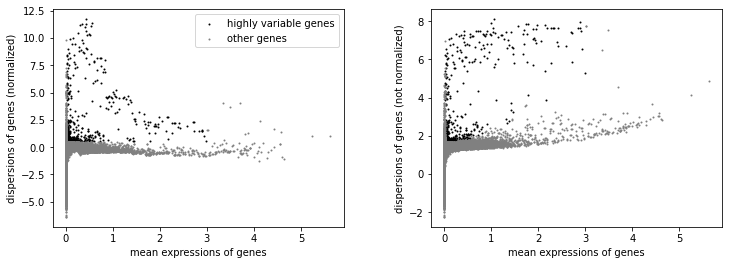

In [33]:
# find highly variable genes
sc.pp.highly_variable_genes(bdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(bdata)

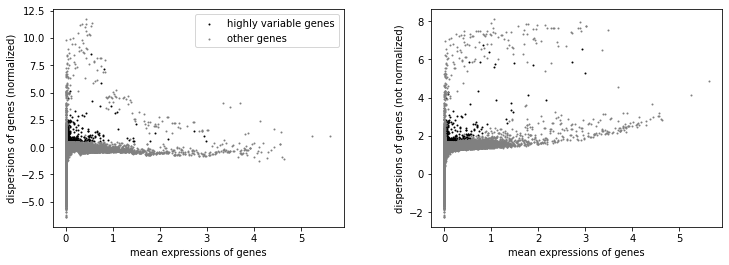

In [34]:
# remove vdj and light chain constant genes from highly variable genes, and also the viral reads, and mitochondrial pseudogenes
import re
for i in bdata.var.index:
    if re.search('^IG[HKL][VDJC]|VIRAL|^MTRNR', i):
        bdata.var.at[i, 'highly_variable'] = False
sc.pl.highly_variable_genes(bdata)

In [35]:
# transfer to .raw slot
bdata.raw = bdata

In [36]:
# Filter the rna genes to only those marked as highly-variable
bdata = bdata[:, bdata.var.highly_variable].copy()
bdata

AnnData object with n_obs × n_vars = 100242 × 411
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartmen

In [37]:
import scvi

In [38]:
scvi.model.SCVI.setup_anndata(
    bdata,
    layer="counts",
    batch_key = 'orig.ident', # this is the sequencing lane
    continuous_covariate_keys=['nCount_RNA', 'percentMito']
)

INFO     Using batches from adata.obs["orig.ident"]                                          


INFO:scvi.data._anndata:Using batches from adata.obs["orig.ident"]


INFO     No label_key inputted, assuming all cells have same label                           


/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/data/_anndata.py:728: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[alternate_column_key] = codes
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/data/_anndata.py:743: UserWarning: Category 31 in adata.obs['_scvi_batch'] has fewer than 3 cells. SCVI may not train properly.
  warnings.warn(
INFO:scvi.data._anndata:No label_key inputted, assuming all cells have same label


INFO     Using data from adata.layers["counts"]                                              


/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/data/_anndata.py:586: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[labels_key] = np.zeros(adata.shape[0], dtype=np.int64)
INFO:scvi.data._anndata:Using data from adata.layers["counts"]


INFO     Successfully registered anndata object containing 100242 cells, 411 vars, 119       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 2 extra continuous covariates.                                                  


INFO:scvi.data._anndata:Successfully registered anndata object containing 100242 cells, 411 vars, 119 batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 2 extra continuous covariates.


INFO     Please do not further modify adata until model is trained.                          


INFO:scvi.data._anndata:Please do not further modify adata until model is trained.
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/data/_anndata.py:315: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(


In [39]:
model = scvi.model.SCVI(bdata)
model

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/model/base/_base_model.py:150: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/model/_utils.py:272: UserWarning: This dataset has some empty cells, this might fail inference.Data should be filtered with `scanpy.pp.filter_cells()`
  warnings.warn(


SCVI Model with the following params: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, 
gene_likelihood: zinb, latent_distribution: normal
Training status: Not Trained

To print summary of associated AnnData, use: scvi.data.view_anndata_setup(model.adata)

In [40]:
model.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/80:   0%|                                                                                                                      | 0/80 [00:00<?, ?it/s]

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:433: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 80/80: 100%|████████████████████████████████████████████████████████████████████████████████████████| 80/80 [11:31<00:00,  8.64s/it, loss=65.4, v_num=1]


In [41]:
latent = model.get_latent_representation()

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/model/base/_base_model.py:150: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


In [42]:
bdata.obsm["X_scVI"] = latent
sc.pp.neighbors(bdata, use_rep="X_scVI")
sc.tl.umap(bdata, min_dist=0.3)

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scanpy/tools/_leiden.py:158: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[key_added] = pd.Categorical(


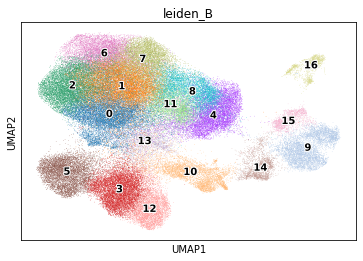

In [43]:
sc.tl.leiden(bdata, key_added = 'leiden_B')
sc.pl.umap(bdata, color = 'leiden_B', legend_loc = 'on data', legend_fontoutline = 2)

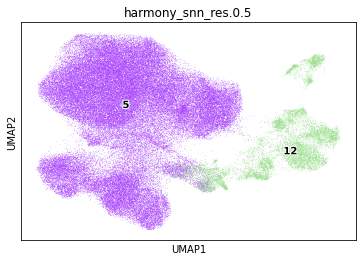

In [44]:
sc.pl.umap(bdata, color = 'harmony_snn_res.0.5', legend_loc = 'on data', legend_fontoutline = 2)

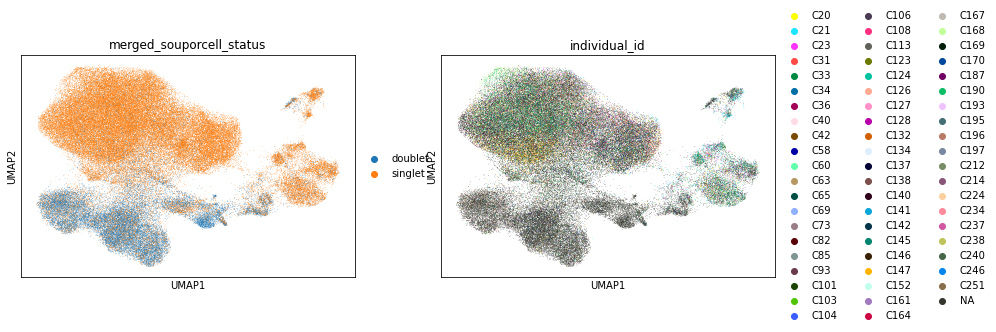

In [45]:
sc.pl.umap(bdata, color=['merged_souporcell_status', 'individual_id'])

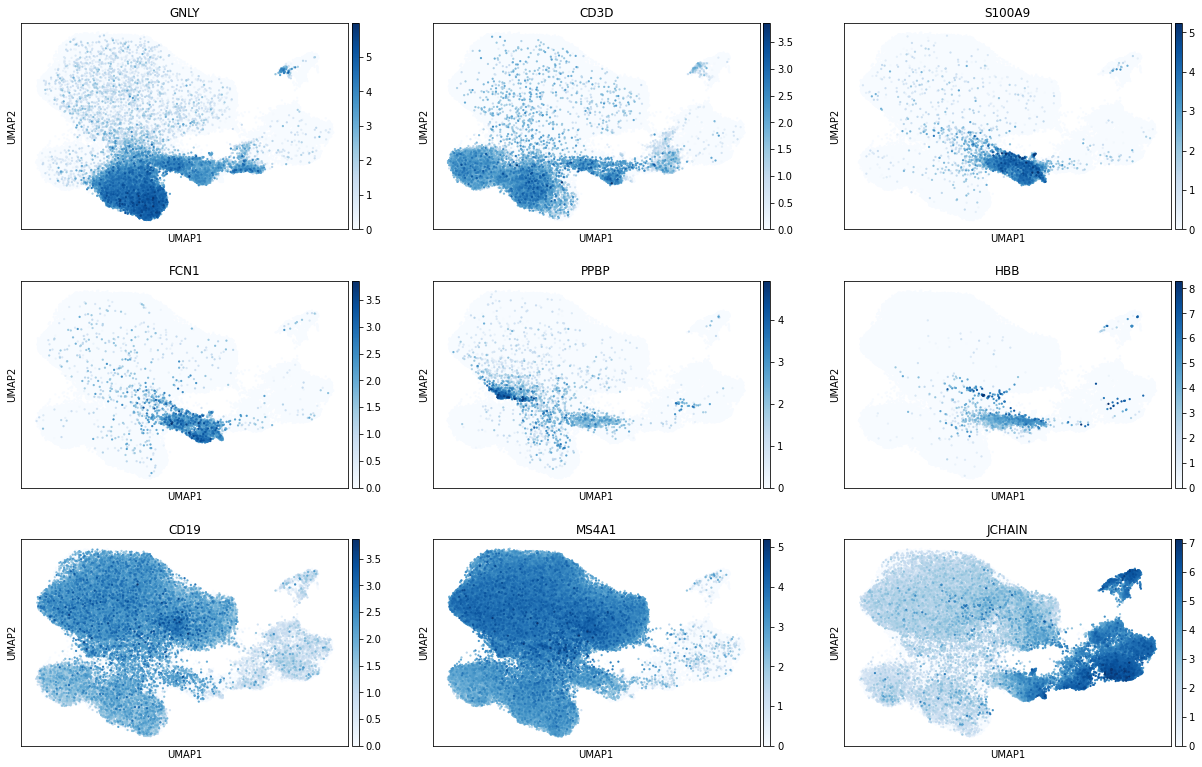

In [46]:
sc.pl.umap(bdata, color=['GNLY', 'CD3D', 'S100A9', 'FCN1', 'PPBP', 'HBB', 'CD19', 'MS4A1', 'JCHAIN'], color_map = 'Blues', size = 20, ncols = 3)

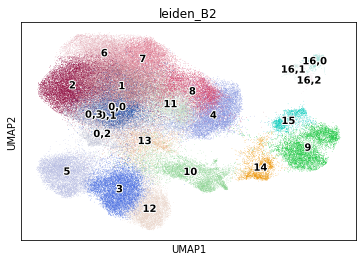

In [91]:
sc.tl.leiden(bdata, key_added = 'leiden_B2', restrict_to = ('leiden_B', ['16']), resolution = .2)
sc.tl.leiden(bdata, key_added = 'leiden_B2', restrict_to = ('leiden_B2', ['0']), resolution = .3)
sc.pl.umap(bdata, color = 'leiden_B2', legend_loc = 'on data', legend_fontoutline = 2)

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scanpy/to

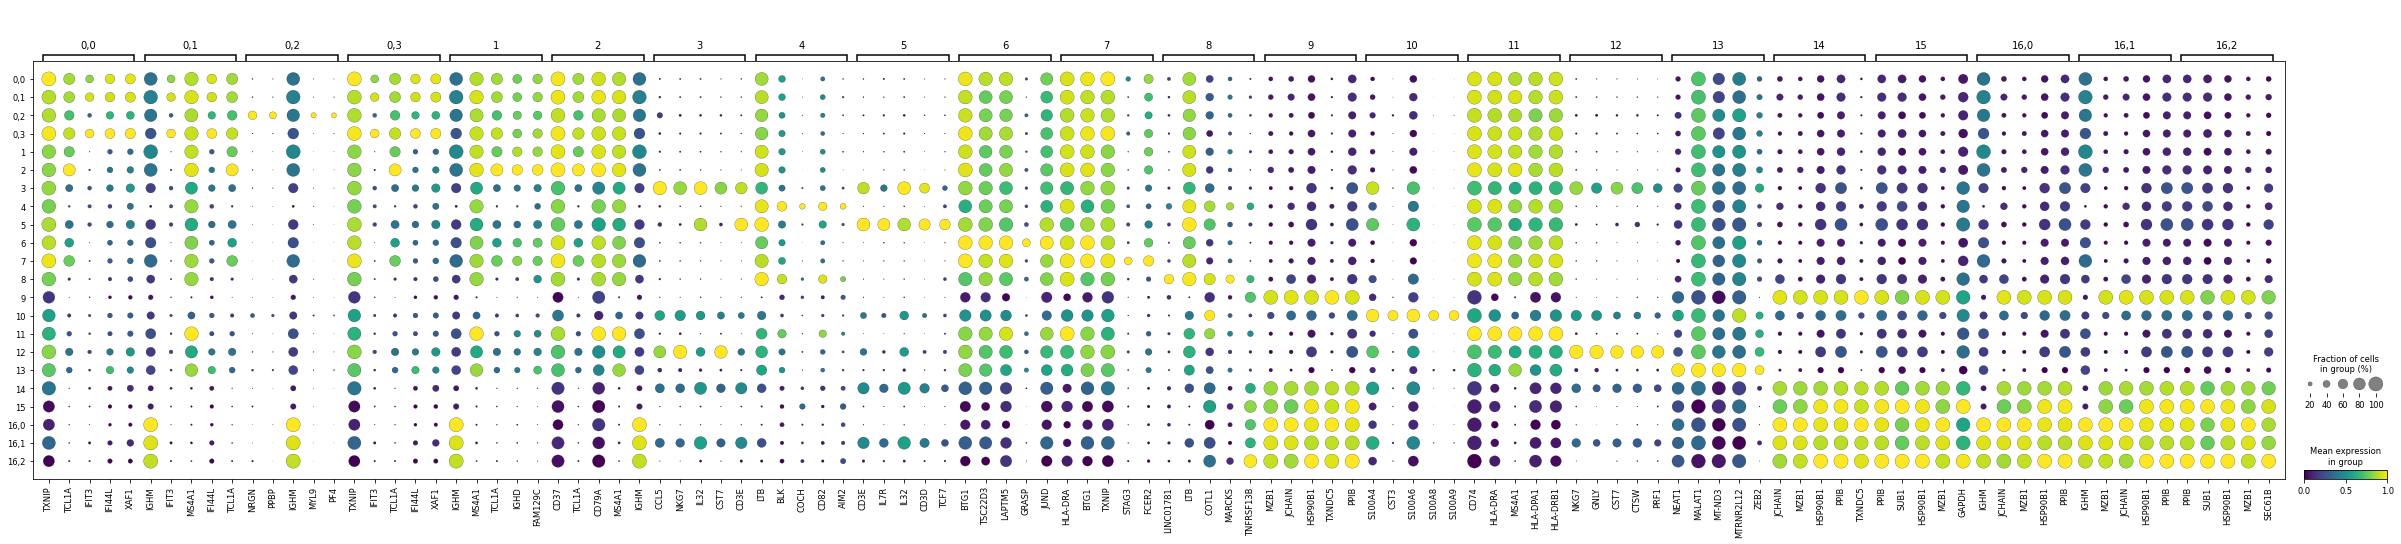

In [92]:
sc.tl.rank_genes_groups(bdata, groupby = 'leiden_B2')
sc.pl.rank_genes_groups_dotplot(bdata, min_logfoldchange =1, n_genes=5, standard_scale = 'var', color_map = 'viridis', dendrogram = False)

/tmp/ipykernel_29623/3470841623.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  bdata.obs['initial_cluster_B'] = [new_dict[x] for x in bdata.obs['leiden_B2']]
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'initial_cluster_B' as categorical


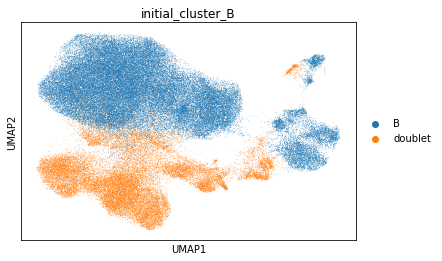

In [93]:
new_dict = {'0,0':'B',
'0,1':'B',
'0,2':'doublet',
'0,3':'B',
'1':'B',
'2':'B',
'3':'doublet',
'4':'B',
'5':'doublet',
'6':'B',
'7':'B',
'8':'B',
'9':'B',
'10':'doublet',
'11':'B',
'12':'doublet',
'13':'doublet',
'14':'doublet',
'15':'B',
'16,0':'B',
'16,1':'doublet',
'16,2':'B',}
bdata.obs['initial_cluster_B'] = [new_dict[x] for x in bdata.obs['leiden_B2']]
sc.pl.umap(bdata, color = 'initial_cluster_B')

In [94]:
# update the original object's labels too
adata.obs['initial_cluster_B'] = pd.Series(bdata.obs['initial_cluster_B'].astype('object'))

/tmp/ipykernel_29623/3347214430.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs['initial_cluster_B'] = pd.Series(bdata.obs['initial_cluster_B'].astype('object'))


### repeat filtering

In [95]:
# subset to B cell looking clusters
bdata = adata[adata.obs['initial_cluster_B'].isin(['B'])].copy()
bdata

AnnData object with n_obs × n_vars = 68683 × 33559
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartme

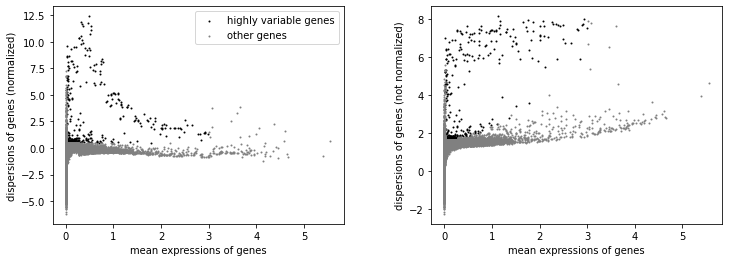

In [96]:
# find highly variable genes
sc.pp.highly_variable_genes(bdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(bdata)

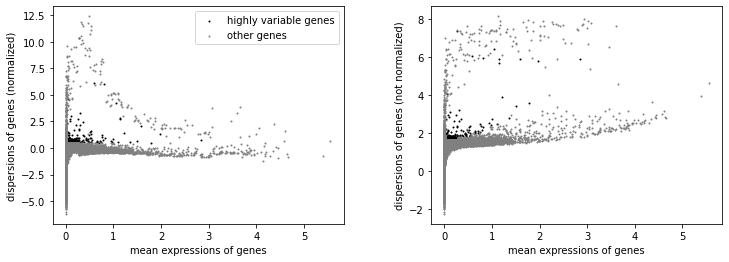

In [97]:
# remove vdj and light chain constant genes from highly variable genes, and also the viral reads
import re
for i in bdata.var.index:
    if re.search('^IG[HKL][VDJC]|VIRAL|^MTRN', i):
        bdata.var.at[i, 'highly_variable'] = False
sc.pl.highly_variable_genes(bdata)

In [98]:
# transfer to .raw slot
bdata.raw = bdata

In [99]:
# Filter the rna genes to only those marked as highly-variable
bdata = bdata[:, bdata.var.highly_variable].copy()
bdata

AnnData object with n_obs × n_vars = 68683 × 330
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartment

In [100]:
scvi.model.SCVI.setup_anndata(
    bdata,
    layer="counts",
    batch_key = 'orig.ident',
    continuous_covariate_keys=['nCount_RNA', 'percentMito']
)

INFO     Using batches from adata.obs["orig.ident"]                                          


INFO:scvi.data._anndata:Using batches from adata.obs["orig.ident"]


INFO     No label_key inputted, assuming all cells have same label                           


/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/data/_anndata.py:728: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[alternate_column_key] = codes
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/data/_anndata.py:743: UserWarning: Category 31 in adata.obs['_scvi_batch'] has fewer than 3 cells. SCVI may not train properly.
  warnings.warn(
INFO:scvi.data._anndata:No label_key inputted, assuming all cells have same label


INFO     Using data from adata.layers["counts"]                                              


/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/data/_anndata.py:586: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[labels_key] = np.zeros(adata.shape[0], dtype=np.int64)
INFO:scvi.data._anndata:Using data from adata.layers["counts"]


INFO     Successfully registered anndata object containing 68683 cells, 330 vars, 119        
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 2 extra continuous covariates.                                                  


INFO:scvi.data._anndata:Successfully registered anndata object containing 68683 cells, 330 vars, 119 batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 2 extra continuous covariates.


INFO     Please do not further modify adata until model is trained.                          


INFO:scvi.data._anndata:Please do not further modify adata until model is trained.
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/data/_anndata.py:315: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(


In [101]:
model = scvi.model.SCVI(bdata)
model

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/model/base/_base_model.py:150: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/model/_utils.py:272: UserWarning: This dataset has some empty cells, this might fail inference.Data should be filtered with `scanpy.pp.filter_cells()`
  warnings.warn(


SCVI Model with the following params: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, 
gene_likelihood: zinb, latent_distribution: normal
Training status: Not Trained

To print summary of associated AnnData, use: scvi.data.view_anndata_setup(model.adata)

In [102]:
model.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/116:   0%|                                                                                                                    | 0/116 [00:00<?, ?it/s]

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:433: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 116/116: 100%|████████████████████████████████████████████████████████████████████████████████████| 116/116 [10:07<00:00,  5.24s/it, loss=61.3, v_num=1]


In [103]:
latent = model.get_latent_representation()

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scvi/model/base/_base_model.py:150: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


In [104]:
bdata.obsm["X_scVI"] = latent
sc.pp.neighbors(bdata, use_rep="X_scVI")
sc.tl.umap(bdata, min_dist=0.3)

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/scanpy/tools/_leiden.py:158: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[key_added] = pd.Categorical(
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'initial_cluster_B' as categorical


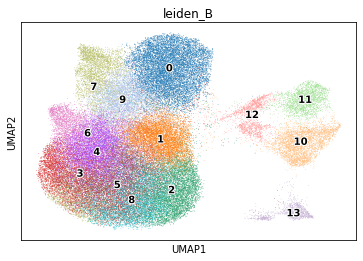

In [105]:
sc.tl.leiden(bdata, key_added = 'leiden_B')
sc.pl.umap(bdata, color = 'leiden_B', legend_loc = 'on data', legend_fontoutline = 2)

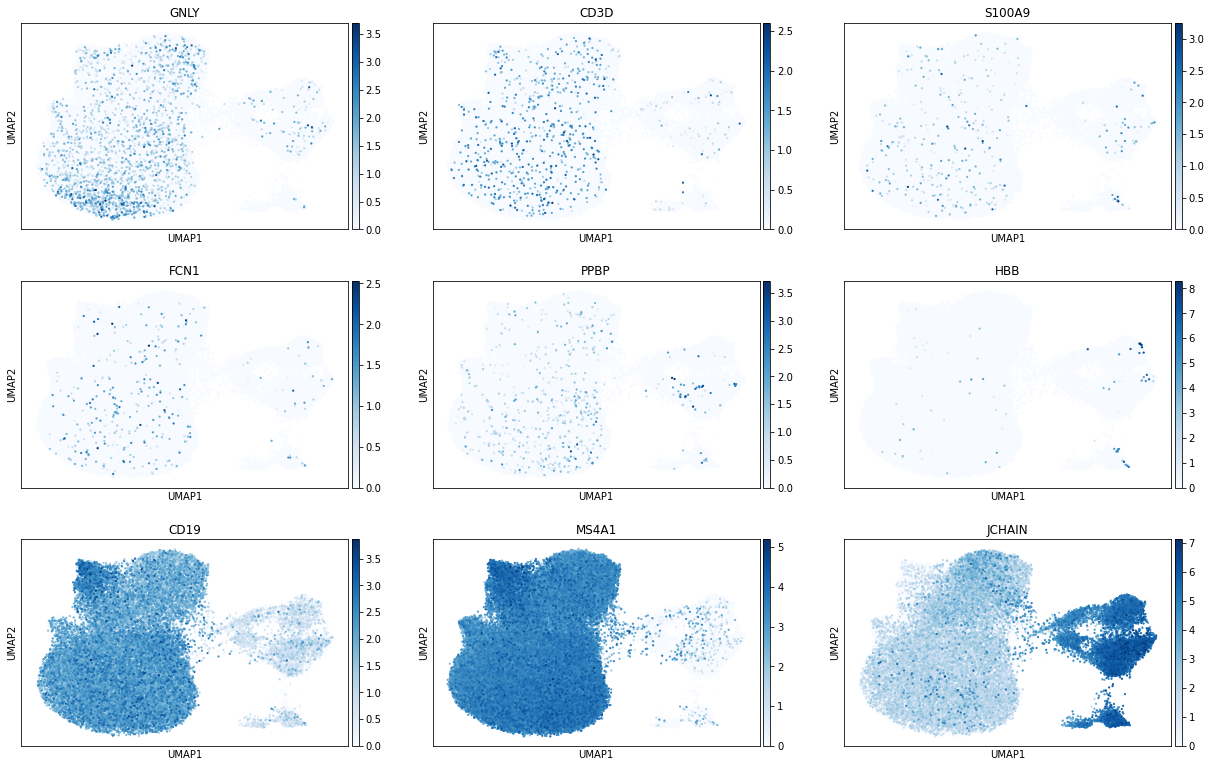

In [106]:
sc.pl.umap(bdata, color=['GNLY', 'CD3D', 'S100A9', 'FCN1', 'PPBP', 'HBB', 'CD19', 'MS4A1', 'JCHAIN'], color_map = 'Blues', size = 20, ncols = 3)

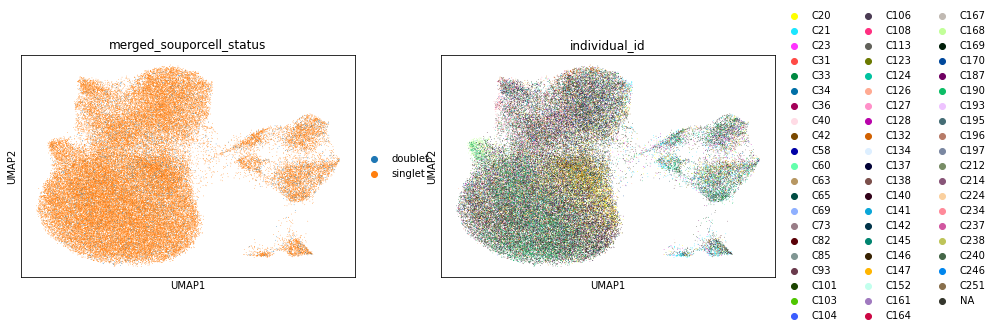

In [107]:
sc.pl.umap(bdata, color=['merged_souporcell_status', 'individual_id'])

/tmp/ipykernel_29623/2691129826.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  bdata.obs['leiden_B_soc'] = [a + '_' + b for a,b in zip(bdata.obs['leiden_B'], bdata.obs['merged_souporcell_status'])]
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'leiden_B_soc' as categorical


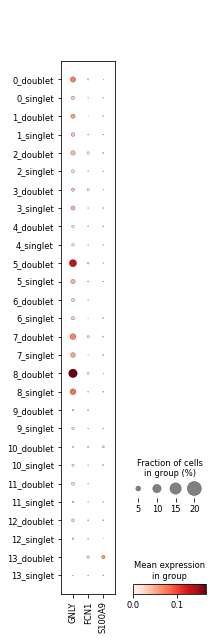

In [108]:
bdata.obs['leiden_B_soc'] = [a + '_' + b for a,b in zip(bdata.obs['leiden_B'], bdata.obs['merged_souporcell_status'])]
sc.pl.dotplot(bdata, ['GNLY','FCN1','S100A9'], groupby = 'leiden_B_soc')

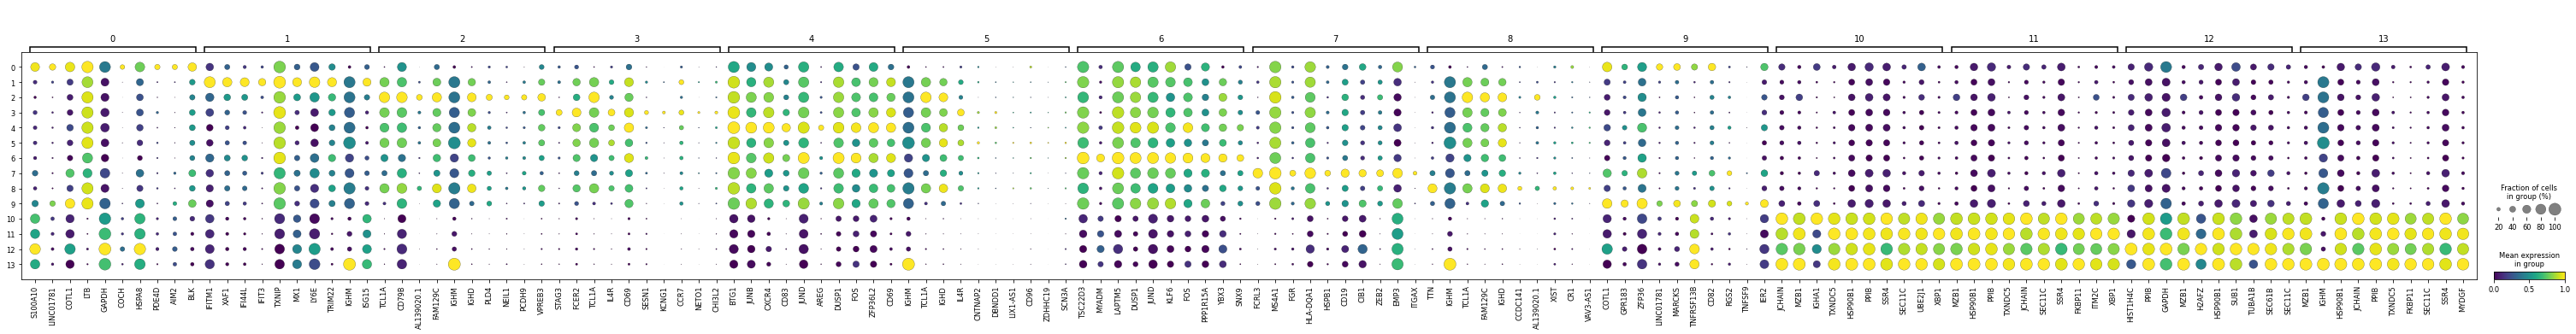

In [109]:
sc.tl.rank_genes_groups(bdata, groupby = 'leiden_B')
sc.pl.rank_genes_groups_dotplot(bdata, min_logfoldchange =1, n_genes=10, standard_scale = 'var',  color_map = 'viridis', dendrogram = False)

In [110]:
# ok this is pretty good then

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'initial_cluster_B' as categorical


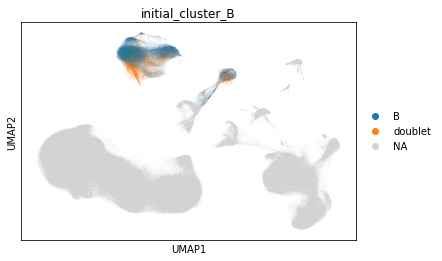

In [111]:
# update the original object's labels too
sc.pl.umap(adata, color = 'initial_cluster_B')

In [112]:
# save first
bdata.write_h5ad('h5ad/df.fil3_gex_bcells_no_CLL_230622.h5ad', compression = 'gzip')

In [113]:
adata.write_h5ad('h5ad/df.fil3_gex_kt_230622.h5ad', compression = 'gzip')